In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC

In [4]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('roberta_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  0.078024  0.197045 -0.020739  0.094564  0.128243  0.240600  0.061715   
1  0.052997  0.107680 -0.061091  0.094924  0.126485  0.117220  0.073628   
2  0.006776  0.080573  0.000706  0.088957  0.300749  0.077344  0.004417   
3  0.085982  0.116390 -0.055298  0.097156  0.335350  0.113604  0.056604   
4  0.068320  0.085632  0.012033  0.116684  0.203147  0.144610  0.073214   

          7         8         9  ...       759       760       761       762  \
0  0.006835 -0.033821 -0.023071  ... -0.006843 -0.031174  0.046497  0.116659   
1  0.067239 -0.050363  0.002889  ... -0.070450  0.000615  0.063038  0.083126   
2  0.052031 -0.048849 -0.019900  ... -0.059084 -0.078838  0.081961  0.086060   
3  0.096919 -0.015422  0.023740  ... -0.076255  0.014202  0.088253  0.141161   
4  0.088204  0.010259 -0.019471  ... -0.044627 -0.060569  0.031133  0.050084   

        763       764       765       766       767      cat_one_hot

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [6]:
def logistic_regression(dataset,max_iter_1,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Entrenar el modelo de regresión logística
        modelo_regresion_logistica.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_regresion_logistica.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "logistica_regression_roberta_embedding_val_sim_"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/regresion_logistica_roberta_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_regresion_logistica = LogisticRegression(multi_class='auto', max_iter=max_iter_1)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_regresion_logistica, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "logistica_regression_roberta_embedding_val_cruz"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/regresion_logistica_roberta_embedding_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_regresion_logistica, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta logistica_regression_roberta_embedding_val_sim_ en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.1.png


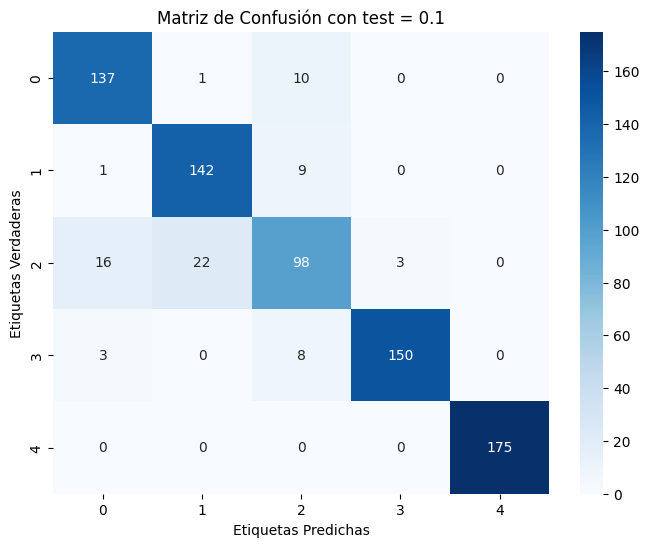

Exactitud del modelo: 0.9058064516129032
Precisión del modelo: 0.9055196842352385
Recall del modelo: 0.9058064516129032
Puntuación F1 del modelo: 0.9047131083206774
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.2.png


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


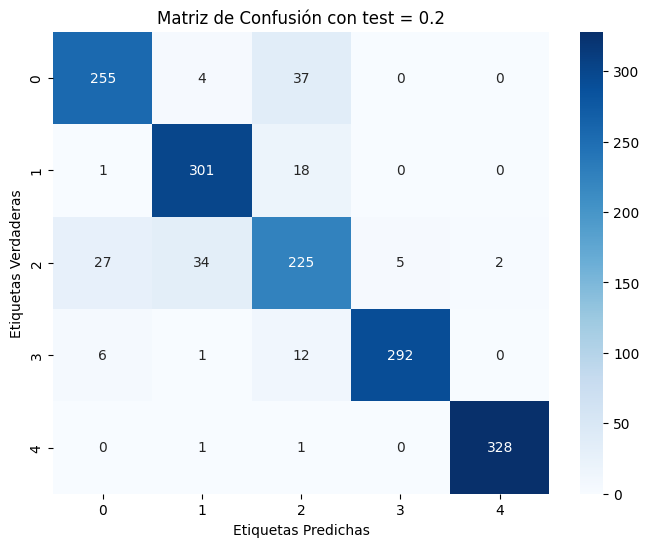

Exactitud del modelo: 0.9038709677419355
Precisión del modelo: 0.9047768538458384
Recall del modelo: 0.9038709677419355
Puntuación F1 del modelo: 0.9040078597423798


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.3.png


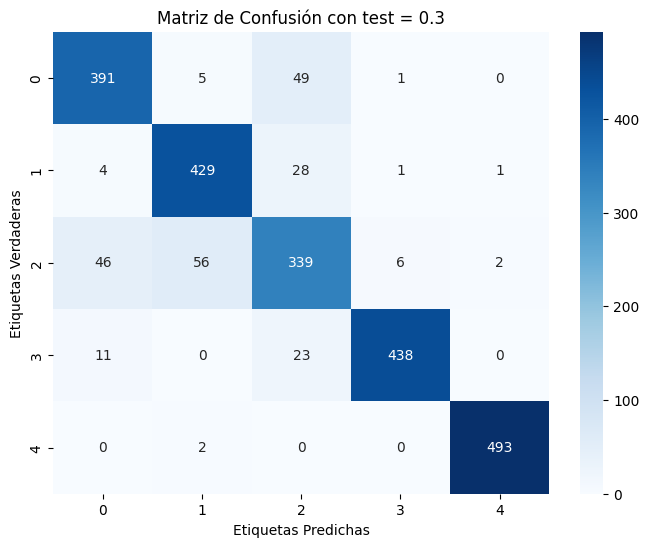

Exactitud del modelo: 0.8989247311827957
Precisión del modelo: 0.8996924410724707
Recall del modelo: 0.8989247311827957
Puntuación F1 del modelo: 0.8989615577371312


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.4.png


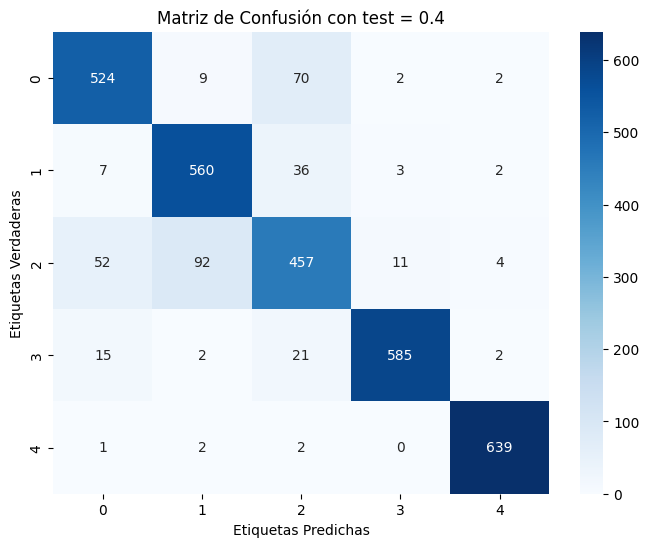

Exactitud del modelo: 0.8919354838709678
Precisión del modelo: 0.8922039811232549
Recall del modelo: 0.8919354838709678
Puntuación F1 del modelo: 0.8915445790503983


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.5.png


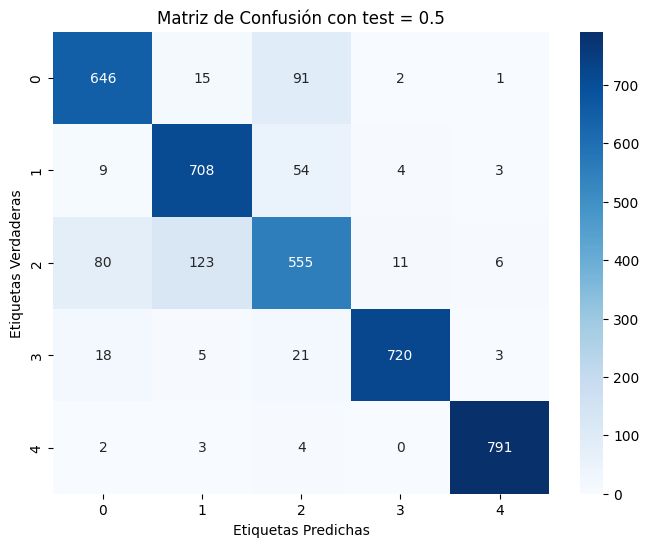

Exactitud del modelo: 0.8825806451612903
Precisión del modelo: 0.8827461982844297
Recall del modelo: 0.8825806451612903
Puntuación F1 del modelo: 0.8820434955648546


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.6.png


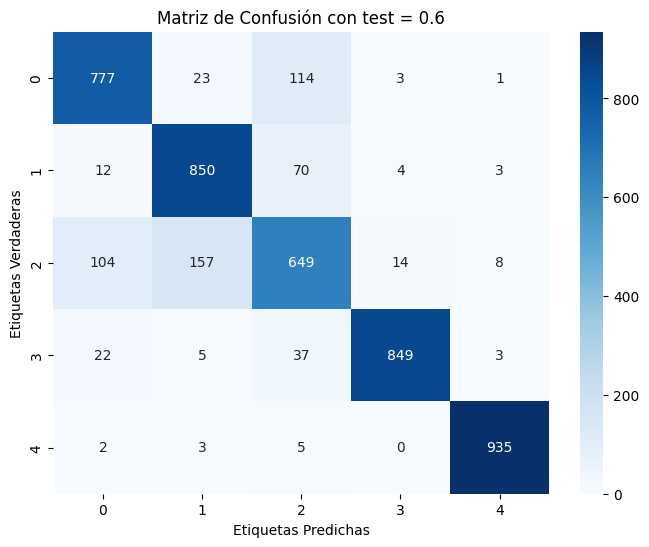

Exactitud del modelo: 0.8731182795698925
Precisión del modelo: 0.8735536087976289
Recall del modelo: 0.8731182795698925
Puntuación F1 del modelo: 0.872630261842354
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.7.png


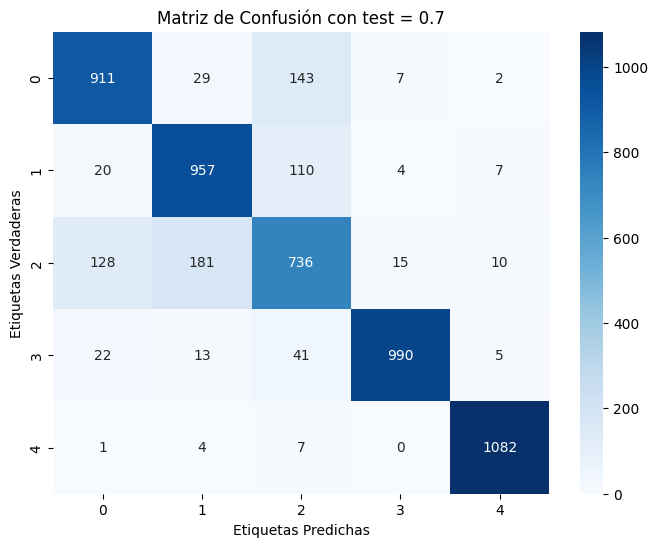

Exactitud del modelo: 0.8619354838709677
Precisión del modelo: 0.8627063768560027
Recall del modelo: 0.8619354838709677
Puntuación F1 del modelo: 0.8619060375721819
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.8.png


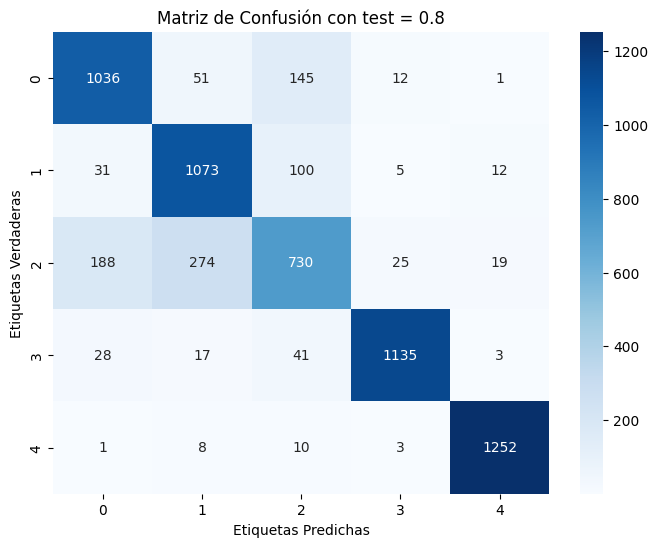

Exactitud del modelo: 0.8429032258064516
Precisión del modelo: 0.8421463307904303
Recall del modelo: 0.8429032258064516
Puntuación F1 del modelo: 0.840360877086135
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_sim_ ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/matriz_confusion_test_0.9.png


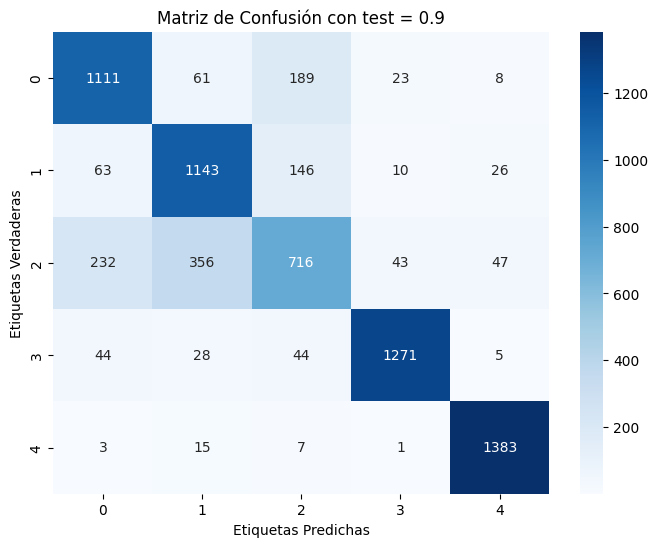

Exactitud del modelo: 0.8063082437275986
Precisión del modelo: 0.8026916770416448
Recall del modelo: 0.8063082437275986
Puntuación F1 del modelo: 0.8019151172503947
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_sim_/regresion_logistica_roberta_embedding_val_simple.json


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Se creó la carpeta logistica_regression_roberta_embedding_val_cruz en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_2.png


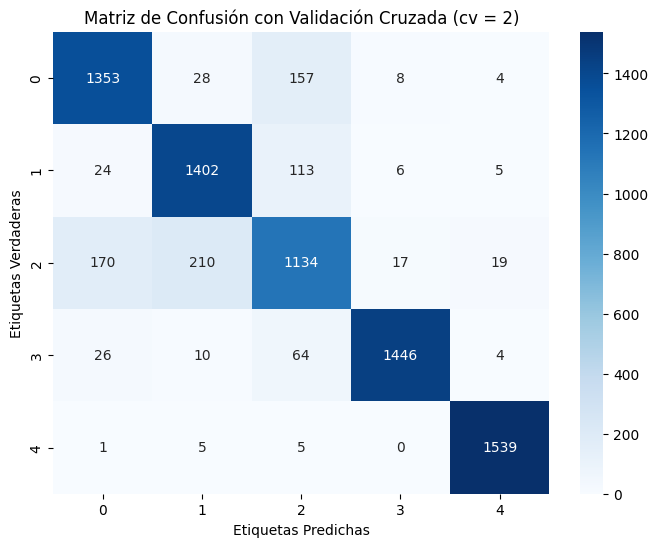

Exactitud media: 0.8869677419354839
Precisión media: 0.8870446108047686
Recall media: 0.8869677419354839
Puntuación F1 media: 0.8865904056946985


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_3.png


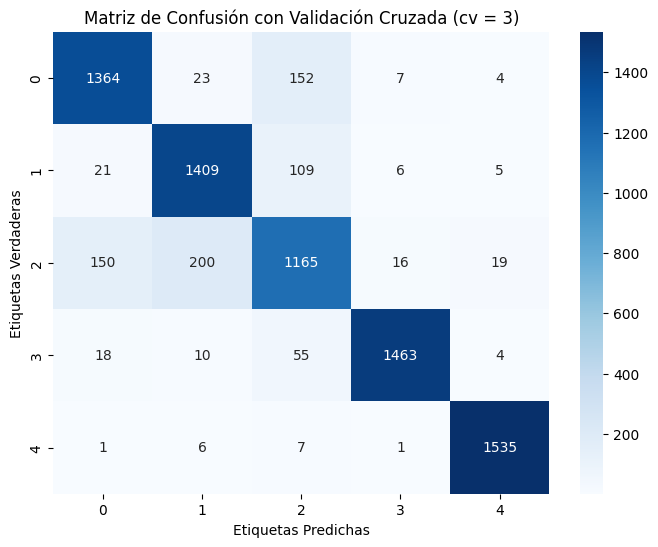

Exactitud media: 0.8949677419354839
Precisión media: 0.895025151100919
Recall media: 0.8949677419354839
Puntuación F1 media: 0.8946932311902052


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_4.png


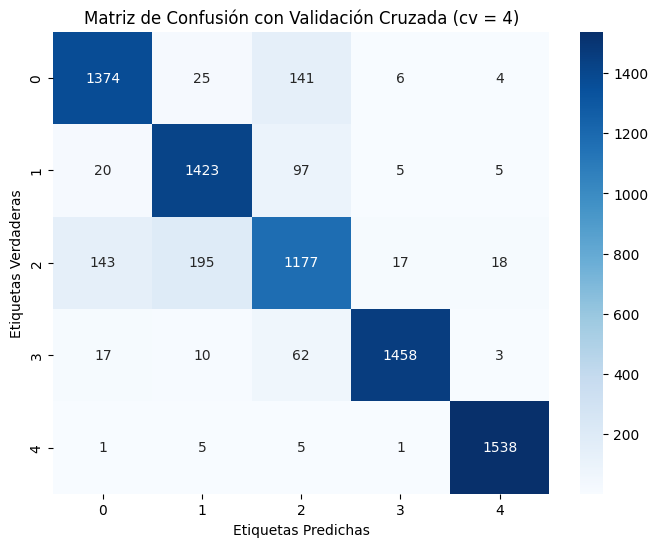

Exactitud media: 0.8993548387096775
Precisión media: 0.8994852555699676
Recall media: 0.8993548387096775
Puntuación F1 media: 0.8990508727231387


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_5.png


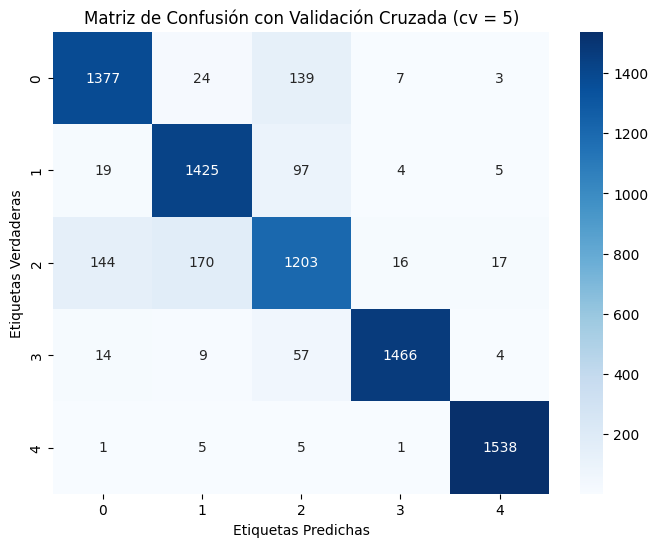

Exactitud media: 0.9043870967741936
Precisión media: 0.9044749938021948
Recall media: 0.9043870967741936
Puntuación F1 media: 0.9041969549652755


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_6.png


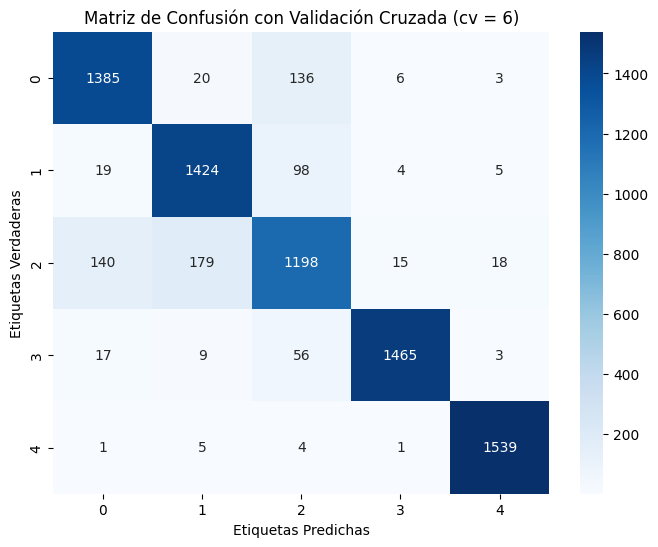

Exactitud media: 0.9046451612903226
Precisión media: 0.9047167750850307
Recall media: 0.9046451612903226
Puntuación F1 media: 0.9044086049130751


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_7.png


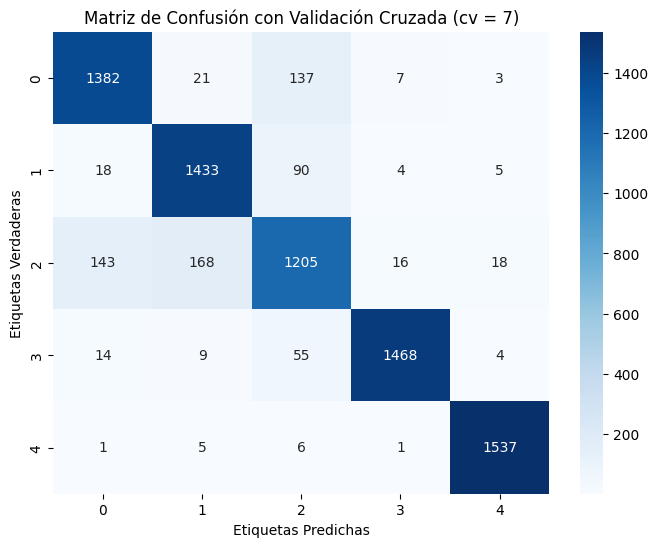

Exactitud media: 0.9064516129032258
Precisión media: 0.9064379777925928
Recall media: 0.9064516129032258
Puntuación F1 media: 0.906190362589397


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_8.png


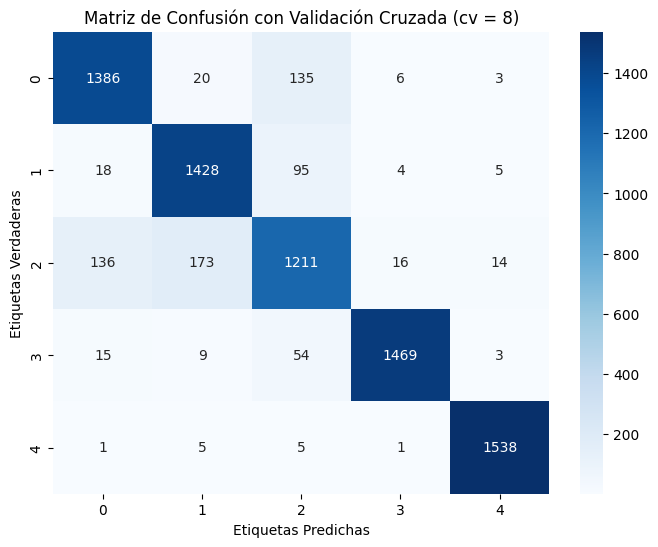

Exactitud media: 0.9073548387096774
Precisión media: 0.9074860640102806
Recall media: 0.9073548387096774
Puntuación F1 media: 0.9071851749563729


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_9.png


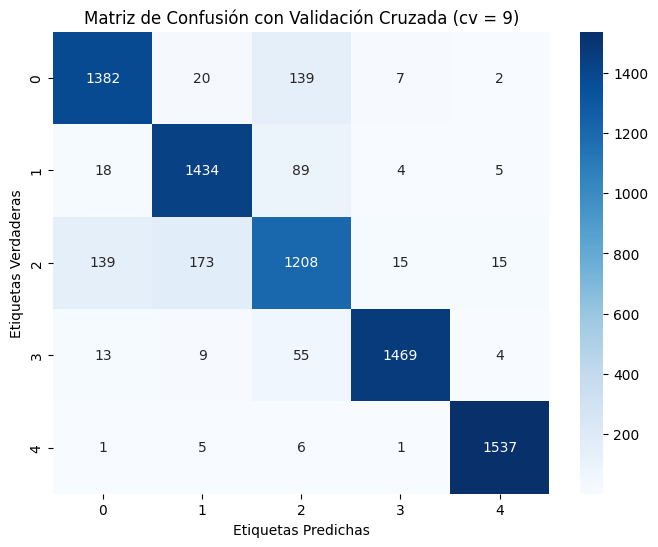

Exactitud media: 0.9070967741935484
Precisión media: 0.9072024722029328
Recall media: 0.9070967741935484
Puntuación F1 media: 0.9068910629566133


C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
La carpeta logistica_regression_roberta_embedding_val_cruz ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Roberta_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/matriz_confusion_cv_10.png


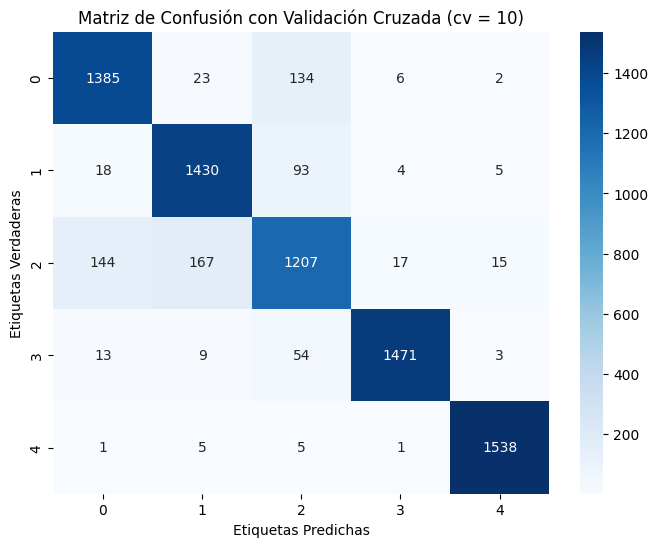

Exactitud media: 0.9072258064516129
Precisión media: 0.907234028641488
Recall media: 0.9072258064516129
Puntuación F1 media: 0.9069894247494052
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Roberta_embeddings/logistica_regression_roberta_embedding_val_cruz/regresion_logistica_roberta_embedding_val_cruz.json


In [7]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/regresion_logistica_roberta_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/regresion_logistica_roberta_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}

experimento = 1
test_size_1 = 0
h = 1000
for i in lista_valores:
    resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = logistic_regression(datos,h,test_size_1=i)
    experimento = experimento + 1

almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)

lista = list(range(2, 11))
for j in lista:
    resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = logistic_regression(datos,h,cv=j)

almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)